## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from keras.datasets import imdb
from keras import models, layers, optimizers, regularizers

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

### **Datos**

In [4]:
# Traemos los datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
# Tokenizamos nuestras palabras
word_index = imdb.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [7]:
# Vectorizamos nuestras bases
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

In [8]:
# Ajustamos nuestros labels para que queden en formato decimal
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### **Red Neuronal**

#### **Configuramos el modelo**

In [9]:
# Inicializamos nuestro modelo
model = models.Sequential()

In [10]:
# Creamos nuestras capas
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Compilamos nuestro modelo
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [12]:
# Separamos nuestra basesde en testeo y validación
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### **Entrenamos el modelo**

In [13]:
history = model.fit(
    partial_X_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 4s 45ms/step - loss: 0.5167 - acc: 0.7899 - val_loss: 0.3899 - val_acc: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3098 - acc: 0.9049 - val_loss: 0.3061 - val_acc: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2286 - acc: 0.9253 - val_loss: 0.2794 - val_acc: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1816 - acc: 0.9416 - val_loss: 0.2881 - val_acc: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1454 - acc: 0.9549 - val_loss: 0.2813 - val_acc: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1223 - acc: 0.9621 - val_loss: 0.2901 - val_acc: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0984 - acc: 0.9714 - val_loss: 0.3378 - val_acc: 0.8730
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0826 - a

#### **Evaluación del modelo**

In [14]:
# Guardamos los resultados de la perdida del modelo en entrenamiento y validación
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)

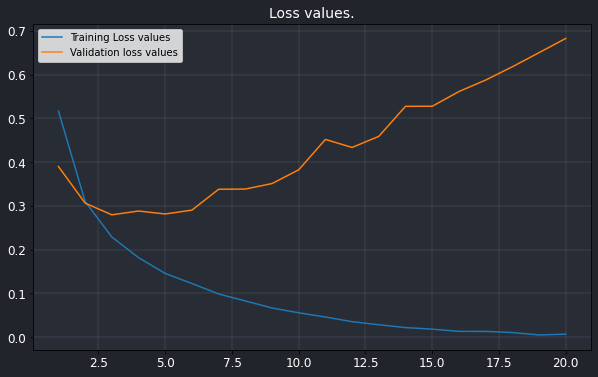

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Loss values.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, loss_values, label='Training Loss values')
plt.plot(epoch, val_loss_values, label='Validation loss values')

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()

In [16]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7518 - acc: 0.8516


[0.7518203258514404, 0.851639986038208]

In [17]:
y_pred = model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


In [18]:
y_pred = np.where(y_pred>0.5, 1, 0)

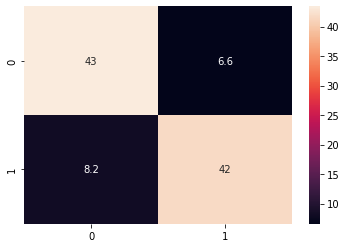

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85     12500
         1.0       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



#### **Ajustando el Overfitting**

##### **1. Reducir complejidad**

In [21]:
# Entrenamos el mismo modelo pero con menos neuronas por capas
model = models.Sequential()

model.add(layers.Dense(4, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_2 = model.fit(
    partial_X_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6153 - acc: 0.7021 - val_loss: 0.5537 - val_acc: 0.8462
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4837 - acc: 0.8681 - val_loss: 0.4523 - val_acc: 0.8559
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3878 - acc: 0.8955 - val_loss: 0.3873 - val_acc: 0.8722
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3206 - acc: 0.9099 - val_loss: 0.3390 - val_acc: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2719 - acc: 0.9221 - val_loss: 0.3106 - val_acc: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2355 - acc: 0.9292 - val_loss: 0.2912 - val_acc: 0.8910
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2077 - acc: 0.9371 - val_loss: 0.2810 - val_acc: 0.8909
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1852 - a

In [22]:
# Guardamos los resultados de la perdida del nuevo modelo
history_2_dict = history_2.history

val_loss_values_2 = history_2_dict['val_loss']

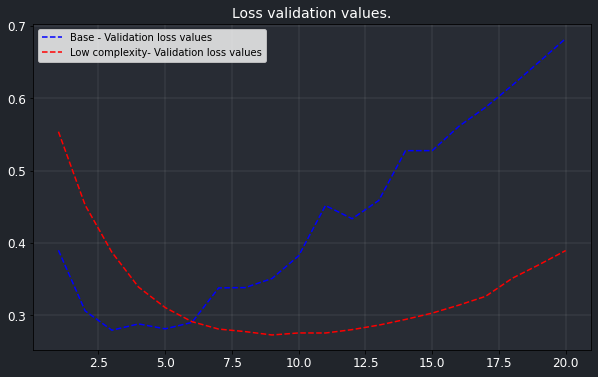

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Loss validation values.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, val_loss_values, '--', label='Base - Validation loss values', color='b')
plt.plot(epoch, val_loss_values_2, '--', label='Low complexity- Validation loss values', color='r')

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()

##### **2. Regularización**

In [29]:
model_reg = models.Sequential()

model_reg.add(layers.Dense(16, 
                       activation='relu',
                       input_shape=(10000,), 
                       kernel_regularizer=regularizers.l2(0.001))
)
model_reg.add(layers.Dense(16, 
                       activation='relu',
                       kernel_regularizer=regularizers.l2(0.001))
)
model_reg.add(layers.Dense(1, activation='sigmoid'))

model_reg.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_reg = model_reg.fit(
    partial_X_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5742 - acc: 0.7830 - val_loss: 0.4551 - val_acc: 0.8582
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3773 - acc: 0.8946 - val_loss: 0.3662 - val_acc: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3031 - acc: 0.9174 - val_loss: 0.3413 - val_acc: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2637 - acc: 0.9322 - val_loss: 0.3719 - val_acc: 0.8711
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2445 - acc: 0.9351 - val_loss: 0.3373 - val_acc: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2272 - acc: 0.9440 - val_loss: 0.3367 - val_acc: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2154 - acc: 0.9500 - val_loss: 0.3453 - val_acc: 0.8832
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2055 - a

In [30]:
# Guardamos los resultados de la perdida del nuevo modelo
history_reg_dict = history_reg.history

val_loss_values_reg = history_reg_dict['val_loss']

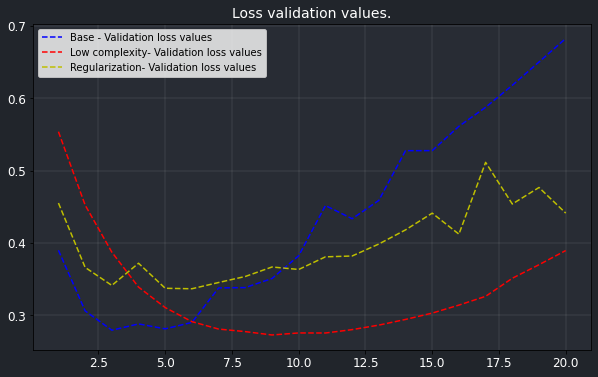

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Loss validation values.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, val_loss_values, '--', label='Base - Validation loss values', color='b')
plt.plot(epoch, val_loss_values_2, '--', label='Low complexity- Validation loss values', color='r')
plt.plot(epoch, val_loss_values_reg, '--', label='Regularization- Validation loss values', color='y')

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()

##### **3. Dropout**

In [32]:
model_do = models.Sequential()

model_do.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model_do.add(layers.Dropout(0.5 ))
model_do.add(layers.Dense(16, activation='relu',))
model_do.add(layers.Dropout(0.5 ))
model_do.add(layers.Dense(1, activation='sigmoid'))

model_do.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_do = model_do.fit(
    partial_X_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6584 - acc: 0.5879 - val_loss: 0.5721 - val_acc: 0.8385
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5602 - acc: 0.7215 - val_loss: 0.4594 - val_acc: 0.8575
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4829 - acc: 0.7852 - val_loss: 0.3882 - val_acc: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4190 - acc: 0.8243 - val_loss: 0.3337 - val_acc: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3697 - acc: 0.8527 - val_loss: 0.3002 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3163 - acc: 0.8746 - val_loss: 0.2813 - val_acc: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2809 - acc: 0.8959 - val_loss: 0.2803 - val_acc: 0.8872
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2508 - a

In [33]:
# Guardamos los resultados de la perdida del nuevo modelo
history_do_dict = history_do.history

val_loss_values_do = history_do_dict['val_loss']

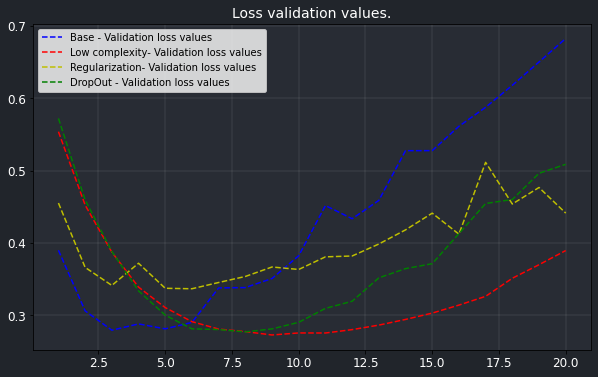

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Loss validation values.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, val_loss_values, '--', label='Base - Validation loss values', color='b')
plt.plot(epoch, val_loss_values_2, '--', label='Low complexity- Validation loss values', color='r')
plt.plot(epoch, val_loss_values_reg, '--', label='Regularization- Validation loss values', color='y')
plt.plot(epoch, val_loss_values_do, '--', label='DropOut - Validation loss values', color='g')

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()

##### **4. Varias combinaciones**

In [35]:
model_fin = models.Sequential()

model_fin.add(layers.Dense(4, 
                       activation='relu',
                       input_shape=(10000,), 
                       kernel_regularizer=regularizers.l2(0.001))
)
model_fin.add(layers.Dropout(0.5 ))
model_fin.add(layers.Dense(4, 
                       activation='relu',
                       kernel_regularizer=regularizers.l2(0.001))
)
model_fin.add(layers.Dropout(0.5 ))
model_fin.add(layers.Dense(1, activation='sigmoid'))

model_fin.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history_fin = model_fin.fit(
    partial_X_train, 
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6948 - acc: 0.5310 - val_loss: 0.6725 - val_acc: 0.7655
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6660 - acc: 0.5847 - val_loss: 0.6187 - val_acc: 0.7747
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6476 - acc: 0.5991 - val_loss: 0.6249 - val_acc: 0.8499
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6362 - acc: 0.6161 - val_loss: 0.5825 - val_acc: 0.8585
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6162 - acc: 0.6333 - val_loss: 0.5418 - val_acc: 0.8714
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6014 - acc: 0.6317 - val_loss: 0.5418 - val_acc: 0.8721
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5871 - acc: 0.6412 - val_loss: 0.4987 - val_acc: 0.8797
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5773 - a

In [36]:
# Guardamos los resultados de la perdida del nuevo modelo
history_fin_dict = history_fin.history

val_loss_values_fin = history_fin_dict['val_loss']

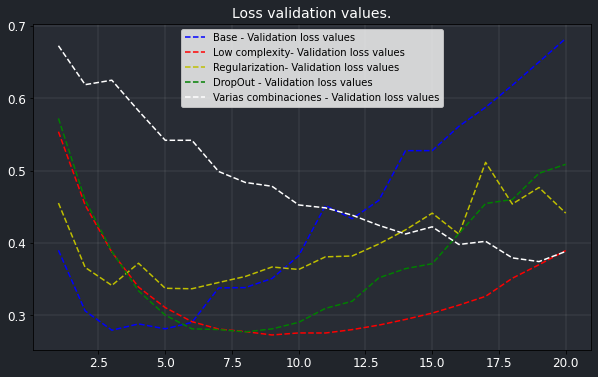

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Loss validation values.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, val_loss_values, '--', label='Base - Validation loss values', color='b')
plt.plot(epoch, val_loss_values_2, '--', label='Low complexity- Validation loss values', color='r')
plt.plot(epoch, val_loss_values_reg, '--', label='Regularization- Validation loss values', color='y')
plt.plot(epoch, val_loss_values_do, '--', label='DropOut - Validation loss values', color='g')
plt.plot(epoch, val_loss_values_fin, '--', label='Varias combinaciones - Validation loss values', color='w')

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()